In [11]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
processeddata=pd.read_csv(r'C:\\Users\\diyas\\Desktop\\SEM5\\Data_Analytics\\Project\\preprocessed_wosq.csv', index_col='Id')

In [3]:
class_names=processeddata.Target.unique()
a=processeddata
class_names=list(class_names)
col1=list(processeddata.columns)
#finding columns with object as datatypes and removing them for classification
data_notnum = list(a.select_dtypes(exclude=[np.number]).columns)
col1=list(filter(lambda a: a not in data_notnum , col1))
X_sq = processeddata[col1] # features for dataset which includes squared parameters
y_sq = processeddata.Target #target

In [6]:
#For selecting the most appopriate columns for our model we will perform two operations.

#Random Forest for feature importance
#Eliminate highly correlated values
clf = RandomForestClassifier()
clf.fit(X_sq , y_sq)

imp = clf.feature_importances_
name = np.array(X_sq.columns.values.tolist())

df_imp = pd.DataFrame({'feature':name, 'importance':imp})
df_imp = df_imp.sort_values(by='importance', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


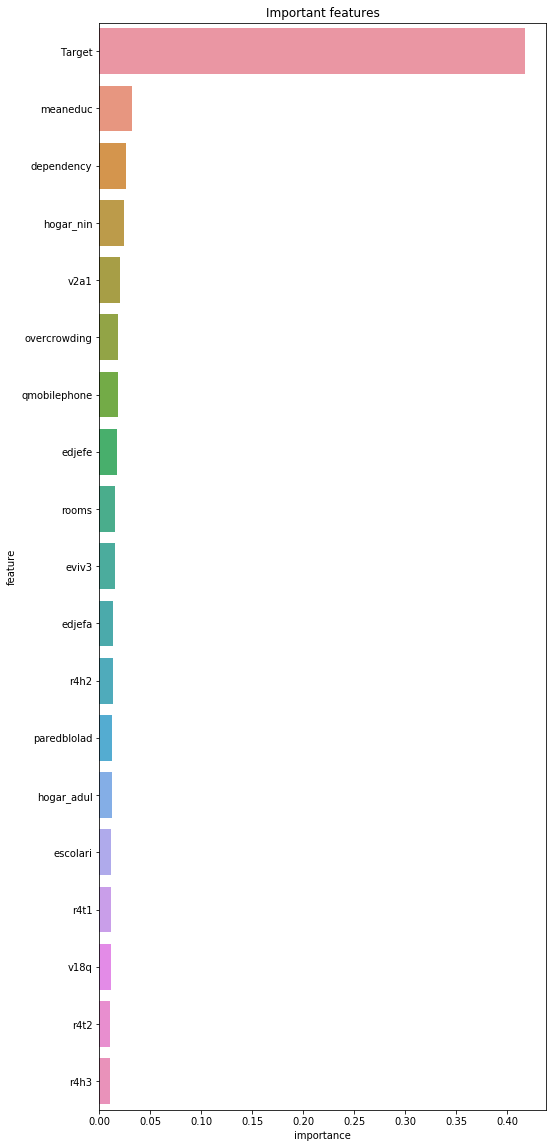

In [9]:
plt.figure(figsize=(8,20))
sns.barplot(df_imp.loc[(df_imp['importance'] > 0.01),'importance'], y = df_imp.loc[(df_imp['importance'] > 0.01),'feature'])
plt.title('Important features')
plt.show()


In [17]:
important_cols = df_imp['feature']
x_ = X_sq[important_cols]